In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [35]:
dataset=pd.read_csv("weight-height.csv")
dataset

,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [36]:
dataset.drop(columns="Gender",inplace=True)

In [37]:
dataset.head()

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [38]:
dataset.shape

(10000, 2)

### Checking Null Values

In [39]:
dataset.isnull().sum()

Weight    0
Height    0
dtype: int64

### Outlier Detection

In [40]:
print(dataset.columns)


Index(['Weight', 'Height'], dtype='object')


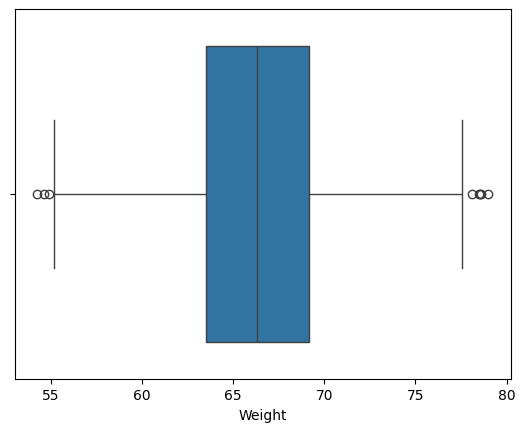

In [41]:
sns.boxplot(x="Weight",data=dataset)
plt.show()

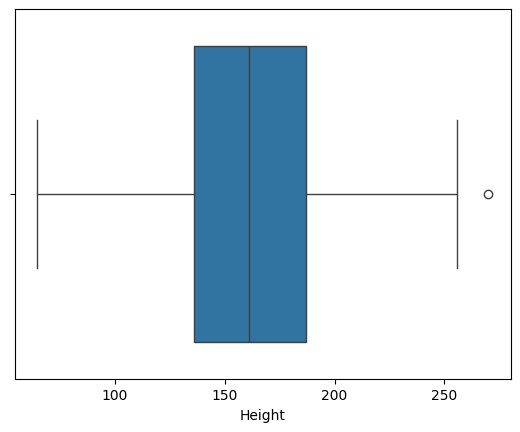

In [42]:
sns.boxplot(x="Height",data=dataset)
plt.show()

In [43]:
dataset.shape

(10000, 2)

### Remove Outlier from Height using IQR

In [44]:
Q1=dataset["Height"].quantile(0.25)
Q3=dataset["Height"].quantile(0.75)
IQR=Q3-Q1

In [45]:
min_range=Q1-(1.5*IQR)
max_range=Q3+(1.5*IQR)


In [46]:
dataset.isna().sum()

Weight    0
Height    0
dtype: int64

### Remove Outlier from original dataset 

In [47]:
#dataset["Height"]=dataset[(dataset["Height"]<=max_range) and (dataset["Height"]>=max_range)]
#dataset["Height"] = dataset[(dataset["Height"] <= max_range) & (dataset["Height"] >= min_range)]
dataset = dataset[(dataset["Height"] <= max_range) & (dataset["Height"] >= min_range)]


In [48]:
dataset.shape

(9999, 2)

### here check outlier after removing outlier 

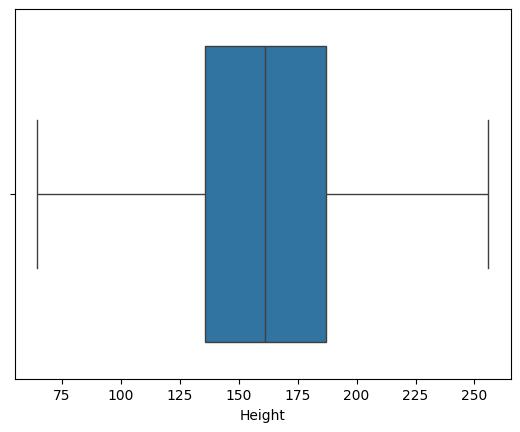

In [49]:
sns.boxplot(x="Height",data=dataset)
plt.show()

### Here will be check in dataset duplicate value preset or not

In [50]:
dataset.shape

(9999, 2)

In [51]:
dataset.drop_duplicates(inplace=True)

C:\Users\KAUSHAL\AppData\Local\Temp\ipykernel_20124\2870039874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop_duplicates(inplace=True)


In [52]:
dataset.shape

(9999, 2)

### Visualize the Relationship

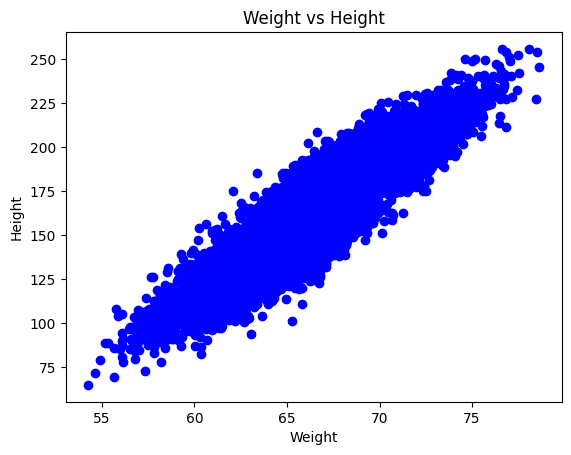

In [53]:
plt.scatter(dataset["Weight"],dataset["Height"],color='blue')
plt.title('Weight vs Height')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()


### Check Correlation

### Understanding Correlation Coefficients

The correlation coefficient, typically denoted as \( r \), measures the strength and direction of a linear relationship between two variables. The value of \( r \) ranges from -1 to 1:

- **\( r = 1 \)**: Perfect positive linear relationship. As one variable increases, the other variable increases proportionally.
- **\( r = -1 \)**: Perfect negative linear relationship. As one variable increases, the other variable decreases proportionally.
- **\( r = 0 \)**: No linear relationship. The variables do not have a linear association.
- **\( 0 < r < 1 \)**: Positive correlation. As one variable increases, the other variable tends to also increase.
- **\( -1 < r < 0 \)**: Negative correlation. As one variable increases, the other variable tends to decrease.


In [54]:
dataset.corr()

,Weight,Height
Weight,1.000000,0.924673
Height,0.924673,1.000000


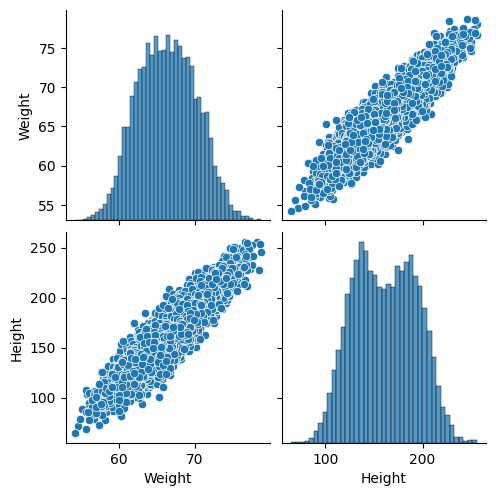

In [55]:
sns.pairplot(dataset)

### Independent and Dependent Features

In [56]:
X=dataset[["Weight"]] ### independent features should be data frame or 2 dimensional
y=dataset["Height"] ### This variable can be in series or 1d array


In [57]:
x_series=dataset['Weight']
np.array(x_series).shape

(9999,)

### Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [60]:
x_train.shape

(7499, 1)

### Standardization

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)


In [63]:
x_test=scaler.transform(x_test)

In [64]:
x_test

array([[-2.868263  ],
       [-0.30897074],
       [ 0.01789069],
       ...,
       [-1.0599388 ],
       [ 0.19705207],
       [ 0.33024333]])

## Apply Simple Liner Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
regression=LinearRegression(n_jobs=-1)
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [67]:
print("Coefficient or slope: ",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient or slope:  [29.47788337]
Intercept:  161.21487186628886


In [68]:
regression.score(x_test,y_test)*100

86.19112246300243

### Plot Training data plot best fit Line

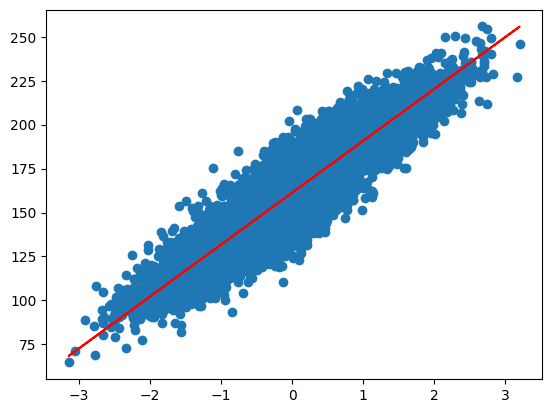

In [69]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train),color="red")

### Predication for Test data
  

#### 1. predicted height output=intercept+coef_(weight)
#### 2. y_pred_test=66.35098820851705+3.52713567(x_test)

In [70]:
y_pred=regression.predict(x_test)


### Performance Matrix

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [72]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

146.50756091581178
9.694125765094924
12.104030771433612


### R² Score (R-squared)

R² Score (R-squared) is a metric that indicates how well your model's predictions fit the actual data.

#### What It Represents:
- **R² = 1**: Perfect fit; your model explains all the variability in the data.
- **R² = 0**: The model does no better than simply predicting the mean of the target variable.
- **R² < 0**: The model performs worse than predicting the mean.


In [73]:
from sklearn.metrics import r2_score


score=r2_score(y_test,y_pred)*100
print(score)

86.19112246300243


## OLS Linear Regression


In [74]:
import statsmodels.api as sm



In [75]:
model=sm.OLS(y_train,x_train).fit()

In [76]:
prediction=model.predict(x_test)

In [77]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              249.2
Date:                Tue, 13 Aug 2024   Prob (F-statistic):                    2.93e-55
Time:                        23:33:58   Log-Likelihood:                         -48778.
No. Observations:                7499   AIC:                                  9.756e+04
Df Residuals:                    7498   BIC:                                  9.756e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [78]:
dataset.head()

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


### Predication for new Data 

In [79]:
regression.predict(scaler.transform([[71.730978]]))

c:\Users\KAUSHAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([202.75847999])